## 3. Random Search

Often some of the hyperparameters matter much more than others. Performing random search rather than grid search allows a much more precise discovery of good values for the important ones.



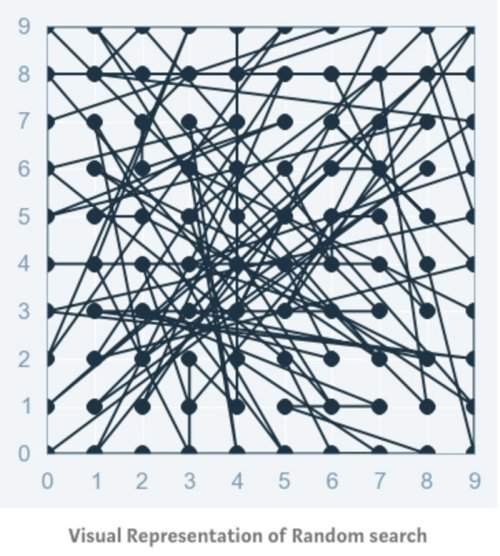

Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score. This allows you to explicitly control the number of parameter combinations that are attempted. The number of search iterations is set based on time or resources. Scikit Learn offers the RandomizedSearchCV function for this process.

While it’s possible that RandomizedSearchCV will not find as accurate a result as GridSearchCV, it surprisingly picks the best result more often than not and in a fraction of the time it takes GridSearchCV would have taken. Given the same resources, Randomized Search can even outperform Grid Search. This can be visualized in the graphic below when continuous parameters are used.

The chances of finding the optimal parameter are comparatively higher in random search because of the random search pattern where the model might end up being trained on the optimized parameters without any aliasing. Random search works best for lower dimensional data since the time taken to find the right set is less with less number of iterations. Random search is the best parameter search technique when there is less number of dimensions.

In the case of deep learning algorithms, it outperforms the grid search.



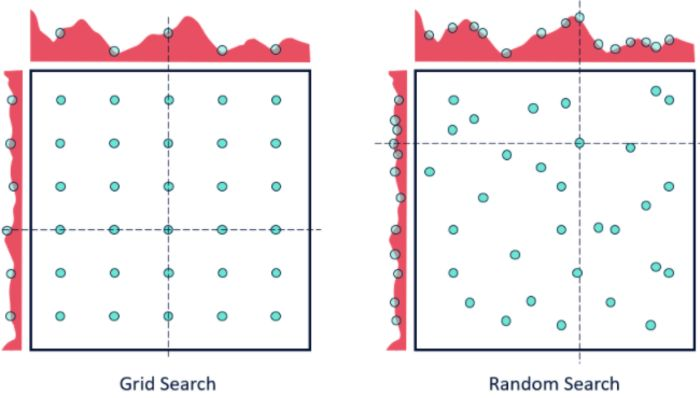

In [5]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [6]:
iris = load_iris()

In [7]:
df = pd.DataFrame(iris.data,columns=iris['feature_names'])

In [8]:
df['target'] = iris['target']

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = df['target']

In [11]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,rbf,0.980000
1,20,rbf,0.966667


In [12]:
rs.fit(X,y)

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_iter=2,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']})

In [13]:
# print the best score throughout the grid search
print(rs.best_score_)
print(rs.best_params_)

0.9800000000000001
{'kernel': 'rbf', 'C': 1}


In Grid Search, the data scientist sets up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data. ... By contrast, Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score